!pip install snscrape

## Scrape tweets

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list2 = []
query = "gpt-3"
limit = 5000

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{query} since:2022-11-01 until:2023-03-13').get_items()):
    if i>limit:
        break
    else: 
        if tweet.lang=='en':
            tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

C:\Users\Acer\AppData\Local\Temp/ipykernel_54488/1912469333.py:15: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])


In [2]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2023-03-12 23:59:59+00:00,1635068147714629632,That's all for tonight folks! We'll be back to...,AskPaddyPower
1,2023-03-12 23:59:50+00:00,1635068110826012673,@jonbrosio You can also do this with Google an...,Czarnecki__Mike
2,2023-03-12 23:58:48+00:00,1635067851672530944,@phry @dan_abramov @park_slope_slut RTK Query ...,rossipedia
3,2023-03-12 23:57:53+00:00,1635067621715615745,Website that gave me a discount code that won'...,feijoa_wine
4,2023-03-12 23:57:21+00:00,1635067487908925440,@dan_abramov @park_slope_slut I might have mis...,phry
...,...,...,...,...
3292,2023-03-11 17:15:44+00:00,1634604027399872514,"@Nedawi1Ryan Hi there, thanks for your query. ...",AskPaddyPower
3293,2023-03-11 17:15:29+00:00,1634603964237860866,@michaelkammes I am also coding something via ...,Har0ldM
3294,2023-03-11 17:15:00+00:00,1634603843614031872,"@elitecasanova_ Hi, please share the query ref...",paytmbankcare
3295,2023-03-11 17:14:16+00:00,1634603657529311232,@Pratiti Hi! Kindly DM your query to assist yo...,flysrilankan


In [3]:
tweets_df2['Text'][2]

'@phry @dan_abramov @park_slope_slut RTK Query and React Query aren\'t what I\'d call "opinionated" frameworks, as they don\'t handle route transitions or bundling or the like.\n\nThey are data fetching libraries, so much more limited in scope, and meant to be called arbitrarily with unpredictable parameters.'

In [5]:
tweets_df2['Text'] = tweets_df2['Text'].apply(lambda x: cleanTxt(x))
tweets_df2['Text'] = tweets_df2['Text'].apply(lambda x: remove_emojis(x))



In [6]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2023-03-12 23:59:59+00:00,1635068147714629632,That's all for tonight folks! We'll be back to...,AskPaddyPower
1,2023-03-12 23:59:50+00:00,1635068110826012673,You can also do this with Google and keep ext...,Czarnecki__Mike
2,2023-03-12 23:58:48+00:00,1635067851672530944,_abramov _slope_slut RTK Query and React Quer...,rossipedia
3,2023-03-12 23:57:53+00:00,1635067621715615745,Website that gave me a discount code that won'...,feijoa_wine
4,2023-03-12 23:57:21+00:00,1635067487908925440,_abramov _slope_slut I might have misinterpret...,phry
...,...,...,...,...
3292,2023-03-11 17:15:44+00:00,1634604027399872514,"Hi there, thanks for your query. We have sent...",AskPaddyPower
3293,2023-03-11 17:15:29+00:00,1634603964237860866,I am also coding something via ChatGPT...What...,Har0ldM
3294,2023-03-11 17:15:00+00:00,1634603843614031872,"_ Hi, please share the query reference no. (if...",paytmbankcare
3295,2023-03-11 17:14:16+00:00,1634603657529311232,Hi! Kindly DM your query to assist you further.,flysrilankan


In [7]:
tweets_df2['Text'][5]

'Kitchen renovation query. Should we have a pot rack that obstructs the...  via  '

In [13]:
tweets_df2.to_csv('tweets.csv', index=False)

## Preprocessing

In [81]:
df = pd.read_csv('tweets-5000.csv')
df

,Datetime,Tweet Id,Text,Username
0,2023-03-12 23:59:59+00:00,1635068147714629632,That's all for tonight folks! We'll be back to...,AskPaddyPower
1,2023-03-12 23:59:50+00:00,1635068110826012673,You can also do this with Google and keep ext...,Czarnecki__Mike
2,2023-03-12 23:58:48+00:00,1635067851672530944,_abramov _slope_slut RTK Query and React Quer...,rossipedia
3,2023-03-12 23:57:53+00:00,1635067621715615745,Website that gave me a discount code that won'...,feijoa_wine
4,2023-03-12 23:57:21+00:00,1635067487908925440,_abramov _slope_slut I might have misinterpret...,phry
...,...,...,...,...
3292,2023-03-11 17:15:44+00:00,1634604027399872514,"Hi there, thanks for your query. We have sent...",AskPaddyPower
3293,2023-03-11 17:15:29+00:00,1634603964237860866,I am also coding something via ChatGPT...What...,Har0ldM
3294,2023-03-11 17:15:00+00:00,1634603843614031872,"_ Hi, please share the query reference no. (if...",paytmbankcare
3295,2023-03-11 17:14:16+00:00,1634603657529311232,Hi! Kindly DM your query to assist you further.,flysrilankan


In [82]:
#For Preprocessing
import re    # RegEx for removing non-letter characters

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sys
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.parse.malt import MaltParser
from nltk.corpus import words
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

import html
from unicodedata import normalize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [84]:
def decode_text(text):
    # remove non-ASCII characters in string
    decoded_text = text.encode('ascii', 'ignore').decode('utf-8')

    # decode HTML entities
    decoded_html = html.unescape(decoded_text)
    return ''.join([word for word in decoded_html if word.isprintable()])

def remove_mentions(text):
    return re.sub("@[A-Za-z0-9_]+","", text)

def remove_stopwords(words_list):
    stop_list = stopwords.words("english")
    stop_list.append("filler")
    return [word for word in words_list if word not in stop_list]

def pos_to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_words(word_list):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    # POS (part-of-speech) tagging
    # nltk_tagged -> a list of tuples (word, pos tag)
    nltk_tagged = nltk.pos_tag(word_list)

    # returns a list of tuples of words and their wordnet_tag (after conversion from NLTK tag)
    wordnet_tagged = list(map(lambda x: (x[0], pos_to_wordnet(x[1])), nltk_tagged))

    # lemmatizing
    lemmatized_words = []
    for word, tag in wordnet_tagged:
        if tag is not None:
            # need POS tag as 2nd argument as it helps lemmatize the words more accurately
            lemmatized_words.append(lemmatizer.lemmatize(word, tag))
        elif tag in [wordnet.NOUN]:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

def clean_original_text(text):
    text = text.lower()
    clean_list = []
    sentence_list = nltk.sent_tokenize(text)
    for sentence in sentence_list:
        decoded_sentence = decode_text(sentence)
        words_list = nltk.RegexpTokenizer(r'\w+').tokenize(decoded_sentence)
        lemmatized_words = lemmatize_words(words_list)
        useful_words = remove_stopwords(lemmatized_words)

        if len(useful_words) > 0:
            clean_list.extend(useful_words)
    clean_text = ' '.join(clean_list)

    return clean_text

In [85]:
df['clean_text'] = df['Text'].apply(clean_original_text)
df['clean_tokens'] = df['Text'].apply(nltk.word_tokenize)



In [86]:
df

,Datetime,Tweet Id,Text,Username,clean_text,clean_tokens
0,2023-03-12 23:59:59+00:00,1635068147714629632,That's all for tonight folks! We'll be back to...,AskPaddyPower,tonight folk back tomorrow morning help query,"[That, 's, all, for, tonight, folks, !, We, 'l..."
1,2023-03-12 23:59:50+00:00,1635068110826012673,You can also do this with Google and keep ext...,Czarnecki__Mike,also google keep extend search query similar q...,"[You, can, also, do, this, with, Google, and, ..."
2,2023-03-12 23:58:48+00:00,1635067851672530944,_abramov _slope_slut RTK Query and React Quer...,rossipedia,_abramov _slope_slut rtk query react query cal...,"[_abramov, _slope_slut, RTK, Query, and, React..."
3,2023-03-12 23:57:53+00:00,1635067621715615745,Website that gave me a discount code that won'...,feijoa_wine,website give discount code win apply send remi...,"[Website, that, gave, me, a, discount, code, t..."
4,2023-03-12 23:57:21+00:00,1635067487908925440,_abramov _slope_slut I might have misinterpret...,phry,_abramov _slope_slut misinterpret ad hoc sente...,"[_abramov, _slope_slut, I, might, have, misint..."
...,...,...,...,...,...,...
3292,2023-03-11 17:15:44+00:00,1634604027399872514,"Hi there, thanks for your query. We have sent...",AskPaddyPower,hi thanks query send across trader touch offer...,"[Hi, there, ,, thanks, for, your, query, ., We..."
3293,2023-03-11 17:15:29+00:00,1634603964237860866,I am also coding something via ChatGPT...What...,Har0ldM,also cod something chatgpt query use mind shar...,"[I, am, also, coding, something, via, ChatGPT,..."
3294,2023-03-11 17:15:00+00:00,1634603843614031872,"_ Hi, please share the query reference no. (if...",paytmbankcare,_ hi please share query reference registered m...,"[_, Hi, ,, please, share, the, query, referenc..."
3295,2023-03-11 17:14:16+00:00,1634603657529311232,Hi! Kindly DM your query to assist you further.,flysrilankan,hi kindly dm query assist,"[Hi, !, Kindly, DM, your, query, to, assist, y..."


## Vader Sentiment Analysis

In [34]:
## VADER


nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...


True

In [87]:
# NLTK VADER for sentiment analysis

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}

# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

print('ok!')

ok!


In [88]:

# Iterate through the headlines and get the polarity scores
scores = df['clean_text'].apply(vader.polarity_scores)

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame.from_records(scores)

# Join the DataFrames
scored_tweets = df.join(scores_df)
scored_tweets.head()

,Datetime,Tweet Id,Text,Username,clean_text,clean_tokens,neg,neu,pos,compound
0,2023-03-12 23:59:59+00:00,1635068147714629632,That's all for tonight folks! We'll be back to...,AskPaddyPower,tonight folk back tomorrow morning help query,"[That, 's, all, for, tonight, folks, !, We, 'l...",0.000,0.690,0.310,0.4019
1,2023-03-12 23:59:50+00:00,1635068110826012673,You can also do this with Google and keep ext...,Czarnecki__Mike,also google keep extend search query similar q...,"[You, can, also, do, this, with, Google, and, ...",0.000,0.841,0.159,0.1779
2,2023-03-12 23:58:48+00:00,1635067851672530944,_abramov _slope_slut RTK Query and React Quer...,rossipedia,_abramov _slope_slut rtk query react query cal...,"[_abramov, _slope_slut, RTK, Query, and, React...",0.076,0.924,0.000,-0.2263
3,2023-03-12 23:57:53+00:00,1635067621715615745,Website that gave me a discount code that won'...,feijoa_wine,website give discount code win apply send remi...,"[Website, that, gave, me, a, discount, code, t...",0.000,0.645,0.355,0.8271
4,2023-03-12 23:57:21+00:00,1635067487908925440,_abramov _slope_slut I might have misinterpret...,phry,_abramov _slope_slut misinterpret ad hoc sente...,"[_abramov, _slope_slut, I, might, have, misint...",0.000,0.813,0.187,0.4404


In [90]:
scored_tweets.to_csv('scored_tweets-5000.csv')

<AxesSubplot:>

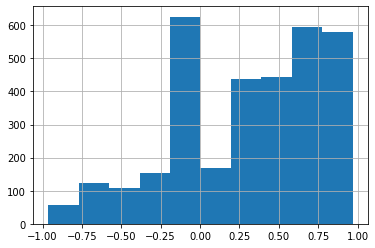

In [91]:
scored_tweets['compound'].hist()

## Topic modelling

In [43]:
# !pip install mglearn


  Using cached mglearn-0.1.9.tar.gz (540 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=fe8e5a73a383dcf2ee10582ecc4cc22b148407bcedc548989060bab2420ea11b
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [92]:
df

,Datetime,Tweet Id,Text,Username,clean_text,clean_tokens
0,2023-03-12 23:59:59+00:00,1635068147714629632,That's all for tonight folks! We'll be back to...,AskPaddyPower,tonight folk back tomorrow morning help query,"[That, 's, all, for, tonight, folks, !, We, 'l..."
1,2023-03-12 23:59:50+00:00,1635068110826012673,You can also do this with Google and keep ext...,Czarnecki__Mike,also google keep extend search query similar q...,"[You, can, also, do, this, with, Google, and, ..."
2,2023-03-12 23:58:48+00:00,1635067851672530944,_abramov _slope_slut RTK Query and React Quer...,rossipedia,_abramov _slope_slut rtk query react query cal...,"[_abramov, _slope_slut, RTK, Query, and, React..."
3,2023-03-12 23:57:53+00:00,1635067621715615745,Website that gave me a discount code that won'...,feijoa_wine,website give discount code win apply send remi...,"[Website, that, gave, me, a, discount, code, t..."
4,2023-03-12 23:57:21+00:00,1635067487908925440,_abramov _slope_slut I might have misinterpret...,phry,_abramov _slope_slut misinterpret ad hoc sente...,"[_abramov, _slope_slut, I, might, have, misint..."
...,...,...,...,...,...,...
3292,2023-03-11 17:15:44+00:00,1634604027399872514,"Hi there, thanks for your query. We have sent...",AskPaddyPower,hi thanks query send across trader touch offer...,"[Hi, there, ,, thanks, for, your, query, ., We..."
3293,2023-03-11 17:15:29+00:00,1634603964237860866,I am also coding something via ChatGPT...What...,Har0ldM,also cod something chatgpt query use mind shar...,"[I, am, also, coding, something, via, ChatGPT,..."
3294,2023-03-11 17:15:00+00:00,1634603843614031872,"_ Hi, please share the query reference no. (if...",paytmbankcare,_ hi please share query reference registered m...,"[_, Hi, ,, please, share, the, query, referenc..."
3295,2023-03-11 17:14:16+00:00,1634603657529311232,Hi! Kindly DM your query to assist you further.,flysrilankan,hi kindly dm query assist,"[Hi, !, Kindly, DM, your, query, to, assist, y..."


In [93]:
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
import matplotlib.pyplot as plt
import numpy as np

In [94]:
vect = CountVectorizer(max_features=100, max_df=.15, stop_words='english')
X = vect.fit_transform(df["clean_text"])

topics = 2
lda = LatentDirichletAllocation(n_components = topics, learning_method="batch", max_iter=5, random_state=0)
document_topics = lda.fit_transform(X)
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(topics), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       
--------      --------      
use           dm            
answer        team          
time          contact       
make          assist        
work          request       
data          thank         
know          thanks        
search        number        
need          help          
sql           regard        




C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


seems like 2 topics are :
topic 0: use cases of chatgpt and people figuring out how to use it
topic 1: people trying to find customer support for chatgpt

In [95]:
topic_df = pd.DataFrame(document_topics, columns=['topic0', 'topic1'])
topic_df

,topic0,topic1
0,0.321332,0.678668
1,0.916461,0.083539
2,0.749945,0.250055
3,0.799373,0.200627
4,0.749079,0.250921
...,...,...
3292,0.112624,0.887376
3293,0.833275,0.166725
3294,0.067560,0.932440
3295,0.125114,0.874886


In [103]:
df = pd.concat([df.reset_index(drop=True), topic_df.reset_index(drop=True)],axis =1)
df["topic_diff"] = df['topic1']-df['topic0']
df.head()
df

,Datetime,Tweet Id,Text,Username,clean_text,clean_tokens,topic0,topic1,topic_diff
0,2023-03-12 23:59:59+00:00,1635068147714629632,That's all for tonight folks! We'll be back to...,AskPaddyPower,tonight folk back tomorrow morning help query,"[That, 's, all, for, tonight, folks, !, We, 'l...",0.321332,0.678668,0.357335
1,2023-03-12 23:59:50+00:00,1635068110826012673,You can also do this with Google and keep ext...,Czarnecki__Mike,also google keep extend search query similar q...,"[You, can, also, do, this, with, Google, and, ...",0.916461,0.083539,-0.832922
2,2023-03-12 23:58:48+00:00,1635067851672530944,_abramov _slope_slut RTK Query and React Quer...,rossipedia,_abramov _slope_slut rtk query react query cal...,"[_abramov, _slope_slut, RTK, Query, and, React...",0.749945,0.250055,-0.499890
3,2023-03-12 23:57:53+00:00,1635067621715615745,Website that gave me a discount code that won'...,feijoa_wine,website give discount code win apply send remi...,"[Website, that, gave, me, a, discount, code, t...",0.799373,0.200627,-0.598747
4,2023-03-12 23:57:21+00:00,1635067487908925440,_abramov _slope_slut I might have misinterpret...,phry,_abramov _slope_slut misinterpret ad hoc sente...,"[_abramov, _slope_slut, I, might, have, misint...",0.749079,0.250921,-0.498159
...,...,...,...,...,...,...,...,...,...
3290,2023-03-11 17:16:57+00:00,1634604334431318016,It is faster. It is powerful. It is more preci...,SyedaMuazma1,faster powerful precise accurate generate vide...,"[It, is, faster, ., It, is, powerful, ., It, i...",0.841029,0.158971,-0.682058
3291,2023-03-11 17:16:43+00:00,1634604277019680768,Try using `SELECT * FROM table_name LIMIT 0` f...,khemsok97,try use select table_name limit test sql query...,"[Try, using, `, SELECT, *, FROM, table_name, L...",0.773803,0.226197,-0.547607
3292,2023-03-11 17:15:44+00:00,1634604027399872514,"Hi there, thanks for your query. We have sent...",AskPaddyPower,hi thanks query send across trader touch offer...,"[Hi, there, ,, thanks, for, your, query, ., We...",0.112624,0.887376,0.774753
3293,2023-03-11 17:15:29+00:00,1634603964237860866,I am also coding something via ChatGPT...What...,Har0ldM,also cod something chatgpt query use mind shar...,"[I, am, also, coding, something, via, ChatGPT,...",0.833275,0.166725,-0.666550


In [114]:
df.to_csv('tweets-5000-topic-scores.csv', index = False)

### Plot distribution

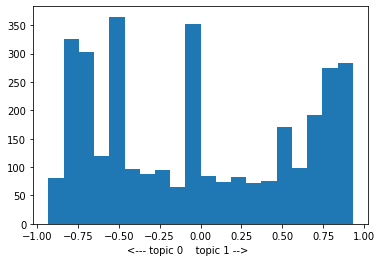

In [105]:
plt.hist(df['topic_diff'], 20)
plt.xlabel("<--- topic 0    topic 1 -->        ")
plt.show()

In [106]:
# percentiles

df.describe(percentiles=[.95, .99, .999])

,Tweet Id,topic0,topic1,topic_diff
count,3.295000e+03,3295.000000,3295.000000,3295.000000
mean,1.634844e+18,0.508704,0.491296,-0.017408
std,1.278272e+14,0.296919,0.296919,0.593838
min,1.634604e+18,0.034994,0.035099,-0.929802
50%,1.634859e+18,0.500000,0.500000,0.000000
95%,1.635033e+18,0.904476,0.935339,0.870677
99%,1.635061e+18,0.934134,0.951233,0.902465
99.9%,1.635068e+18,0.949432,0.962350,0.924699
max,1.635068e+18,0.964901,0.965006,0.930012


In [110]:
# popular tweets about topic 0 (how to use chatgpt)

th99 = 1224

tweet0 = df.query('topic_diff < -0.75' +str(th99))

tw0= tweet0['clean_text'].values

for tw in tw0:
    print('\n' + tw.replace('\n', ' '))


also google keep extend search query similar question people ask

surprise see chatgpt also provide link documentation query chatgpt

hi everyone im lily write horror gothic fantasy right main goal write maybe restart mg story start new continue query qatalk

key factor seo keyword research identify keywords phrase people use search product service optimize website content well match query increase chance rank high search result

way everyone tell one agent response abysmal recent query book devastating stop write month im honestly terrify query luck portion industry suck much

query data schema know nothing set apps know support let say sage ask friend

blog post explains everything need know write query letter

know query rough nobody tell make list agent query dang tiring _ maybe give break til good many agent close writingcommunity amquerying

use right join instead left join possible avoid redundant result sql query codingtips sqltips program

serp much good day query matching ex

In [112]:
# popular tweets about topic 1 (customer support)
tweet1 = df.query('topic_diff > 0.75' + str(th99))
tw1= tweet1['clean_text'].values

for tw in tw1:
    print('\n' + tw.replace('\n', ' '))


raspberrypi python script botthis daily pihole report ad block percentage today dns query today block date

sorry inconvenience kindly elaborate query assist mm

raspberrypi python script botthis daily pihole report ad block percentage today dns query today block date

hi anirudh sincerely regret inconvenience cause representative connect soon assist query request remove comment contain contact card detail security reason

hi sorry inconvenience kindly elaborate query assist mm

hello thank query kindly note virtual card yet activate pesapap update active bm

raspberrypi python script botthis daily pihole report ad block percentage today dns query today block date

dear akhtar motiwala certainly look concern request please share contact detail help good case query reach

_ hi thank connect kindly elaborate query assist mm

raspberrypi python script botthis daily pihole report ad block percentage today dns query today block date

hi sharon thank get touch sorry hear look assist please 